In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fftpack

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


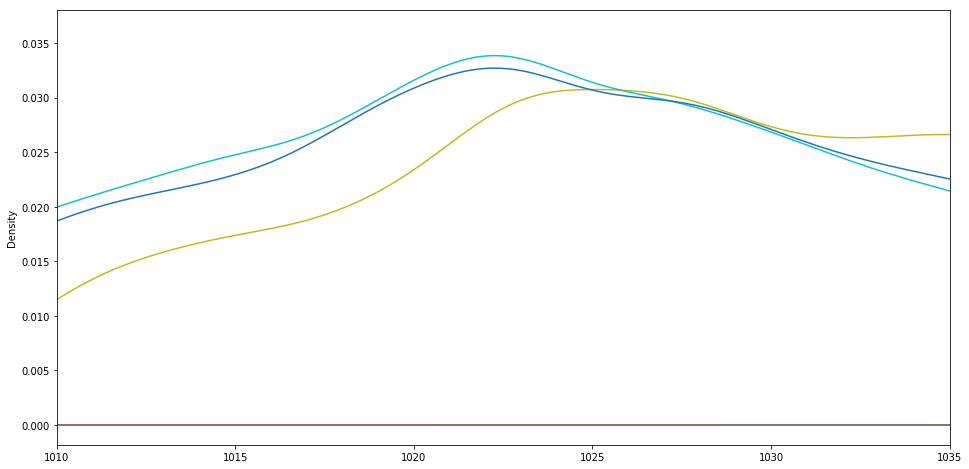

In [18]:
distances = [84, 90, 106, 122, 137, 156, 172, 188, 205, 238, 269, 304, 325, 348]
d = np.array(distances)
V = np.array([])
Vstd = np.array([])
Vstd50 = np.array([])
P = np.array([])

fx = np.linspace(0.0, 1.0/(2.0*4.999/5000), 5000/2)
fy = np.zeros(5000)

for i in range(len(distances)):
    df=pd.read_csv(str(distances[i])+'mm/anag2.csv', header=None, squeeze = True)
    V = np.append(V,np.mean(df[1:]))
    Vstd = np.append(Vstd,np.mean(df[1:]))
    
    V_1s=[np.mean(df[1:50])]
    
    for j in range(10):
        V_1s.append(np.mean(df[1000*(j+1):1000*(j+2)]))
    
    Vstd1 = np.append(Vstd1,np.std(V_1s)*5/4095)
    
    if(i>2):
        df.plot.kde(figsize=(16,8), xlim=(1010, 1035))
        fy = fy + scipy.fftpack.fft(df.values)
    
    df=pd.read_csv(str(distances[i])+'mm/anag1.csv', header=None, squeeze = True)
    P = np.append(P,np.mean(df[1:]))
    

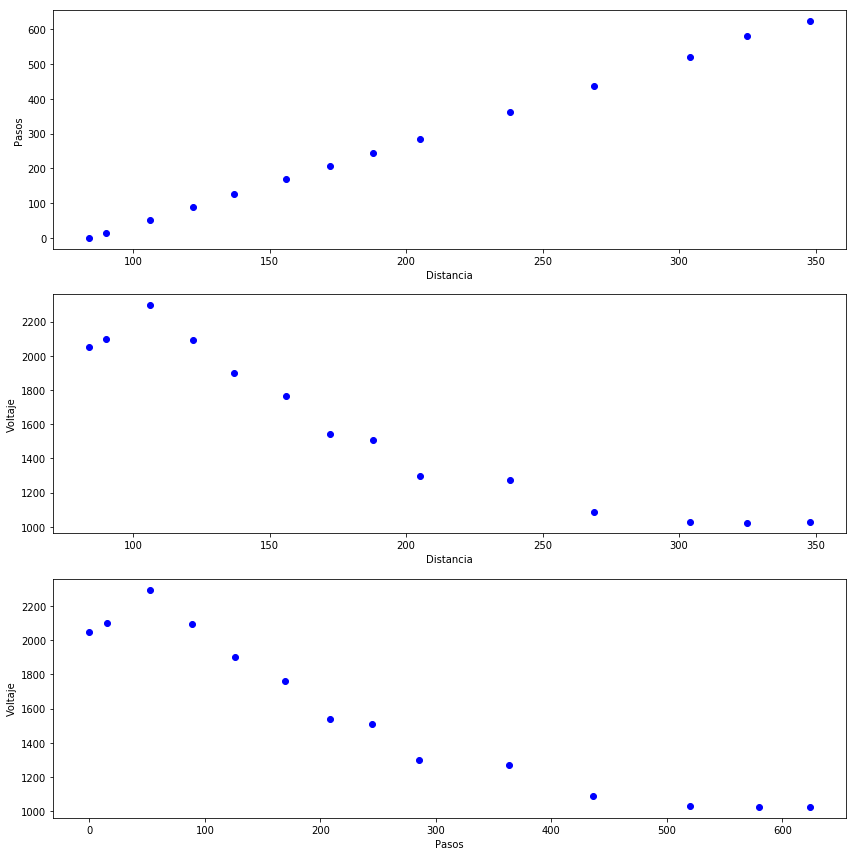

In [5]:
fig, ax = plt.subplots(3, 1, sharex=False, figsize=(12,12))
ax[0].scatter(d,P, color='blue')
#ax[0].fill_betweenx(C, V+Vstd1, V-Vstd1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Pasos')
ax[0].set_xlabel('Distancia')

ax[1].scatter(d,V, color='blue')
#ax[1].fill_between(d, V+Vstd, V-Vstd, facecolor='red', alpha=0.1)
#ax[0].fill_betweenx(C, V+Vstd1, V-Vstd1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia')
ax[1].set_ylabel('Voltaje')

ax[2].scatter(P,V, color='blue')
#ax[2].fill_between(P, V+Vstd, V-Vstd, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(C, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
ax[2].set_xlabel('Pasos')
ax[2].set_ylabel('Voltaje')

fig.tight_layout()

In [5]:
d = np.array(distances)

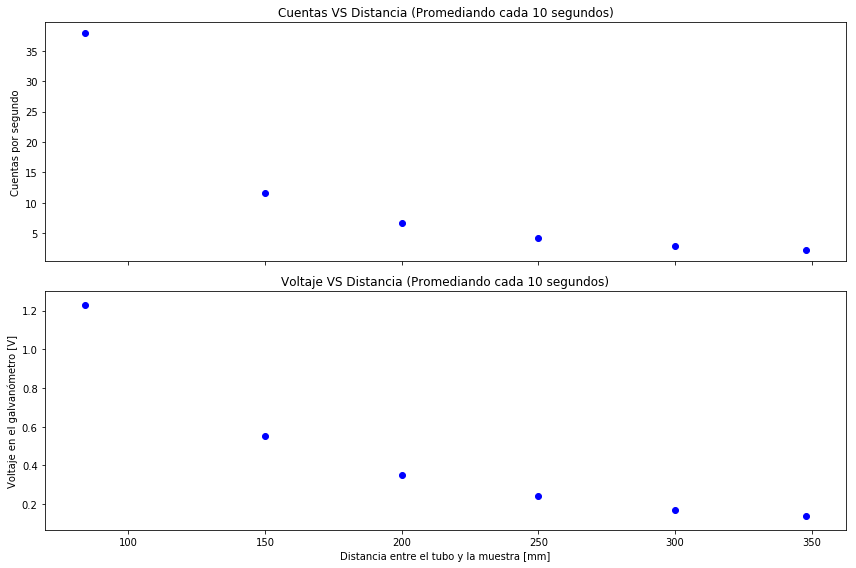

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(d,C, color='blue')
#ax[0].fill_between(d, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
#ax[0].fill_betweenx(C, d+1, d-1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia (Promediando cada 10 segundos)')

ax[1].scatter(d,V, color='blue')
#ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia (Promediando cada 10 segundos)')

fig.tight_layout()

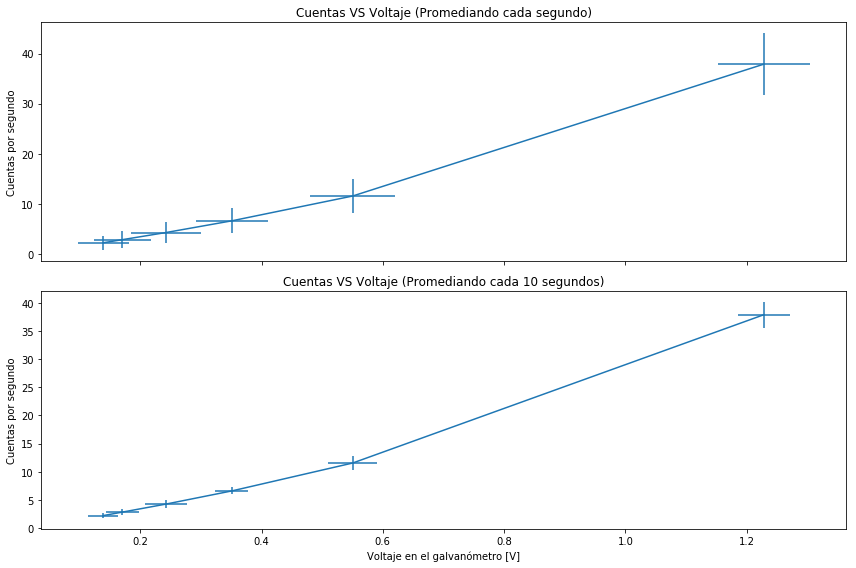

In [254]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(V,C, xerr=Vstd1, yerr=Cstd1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Voltaje (Promediando cada segundo)')

ax[1].errorbar(V,C, xerr=Vstd10, yerr=Cstd10)
ax[1].set_xlabel('Voltaje en el galvanómetro [V]')
ax[1].set_ylabel('Cuentas por segundo')
ax[1].set_title('Cuentas VS Voltaje (Promediando cada 10 segundos)')

fig.tight_layout()

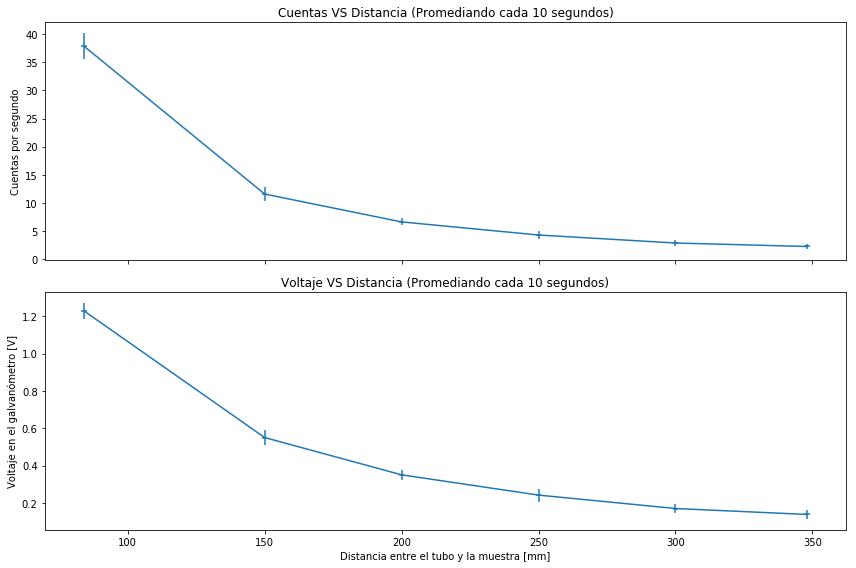

In [257]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(d,C, xerr=1, yerr=Cstd10)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia (Promediando cada 10 segundos)')

ax[1].errorbar(d,V, xerr=1, yerr=Vstd10)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia (Promediando cada 10 segundos)')

fig.tight_layout()

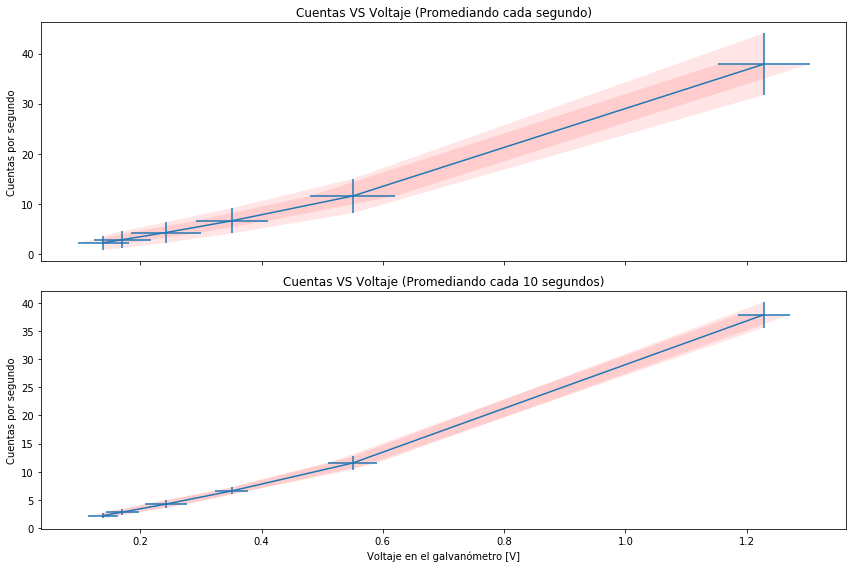

In [259]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(V,C, xerr=Vstd1, yerr=Cstd1)
ax[0].fill_between(V, C+Cstd1, C-Cstd1, facecolor='red', alpha=0.1)
ax[0].fill_betweenx(C, V+Vstd1, V-Vstd1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Voltaje (Promediando cada segundo)')

ax[1].errorbar(V,C, xerr=Vstd10, yerr=Cstd10)
ax[1].fill_between(V, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
ax[1].fill_betweenx(C, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Voltaje en el galvanómetro [V]')
ax[1].set_ylabel('Cuentas por segundo')
ax[1].set_title('Cuentas VS Voltaje (Promediando cada 10 segundos)')

fig.tight_layout()

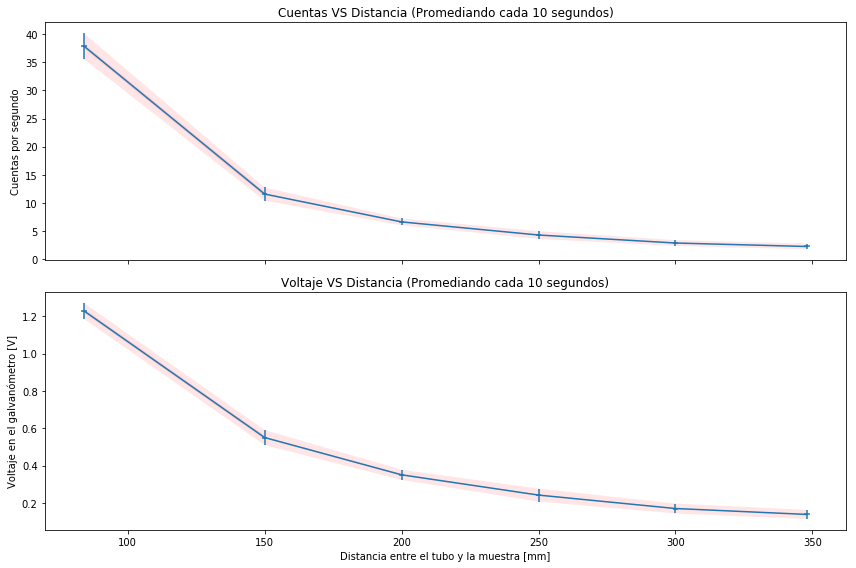

In [262]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(d,C, xerr=1, yerr=Cstd10)
ax[0].fill_between(d, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
ax[0].fill_betweenx(C, d+1, d-1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia (Promediando cada 10 segundos)')

ax[1].errorbar(d,V, xerr=1, yerr=Vstd10)
ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia (Promediando cada 10 segundos)')

fig.tight_layout()